## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
cc_data = pd.read_csv('../raw_data/fraudTrain_cleaned.csv', index_col=0)

/Users/chrischung/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
cc_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,1967-01-12,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,0


In [4]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296569 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296569 non-null  object 
 1   cc_num                 1296569 non-null  int64  
 2   merchant               1296569 non-null  object 
 3   category               1296569 non-null  object 
 4   amt                    1296569 non-null  float64
 5   first                  1296569 non-null  object 
 6   last                   1296569 non-null  object 
 7   gender                 1296569 non-null  object 
 8   street                 1296569 non-null  object 
 9   city                   1296569 non-null  object 
 10  state                  1296569 non-null  object 
 11  zip                    1296569 non-null  int64  
 12  city_pop               1296569 non-null  int64  
 13  job                    1296569 non-null  object 
 14  dob               

In [5]:
# Filter out 'street', 'city', 'zip' columns
cc_data.drop(['street', 'city', 'zip'], axis=1, inplace=True)

In [6]:
#Convert 'cc_num' to object
cc_data['cc_num'] = cc_data['cc_num'].apply(str)

cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296569 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296569 non-null  object 
 1   cc_num                 1296569 non-null  object 
 2   merchant               1296569 non-null  object 
 3   category               1296569 non-null  object 
 4   amt                    1296569 non-null  float64
 5   first                  1296569 non-null  object 
 6   last                   1296569 non-null  object 
 7   gender                 1296569 non-null  object 
 8   state                  1296569 non-null  object 
 9   city_pop               1296569 non-null  int64  
 10  job                    1296569 non-null  object 
 11  dob                    1296569 non-null  object 
 12  is_fraud               1296569 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 138.5+ MB


In [7]:
cc_data.describe()

,amt,city_pop,is_fraud
count,1.296569e+06,1.296569e+06,1.296569e+06
mean,6.957281e+01,8.882348e+04,5.789125e-03
std,1.278001e+02,3.019563e+05,7.586577e-02
min,1.000000e+00,2.300000e+01,0.000000e+00
25%,9.650000e+00,7.430000e+02,0.000000e+00
50%,4.751000e+01,2.456000e+03,0.000000e+00
75%,8.312000e+01,2.032800e+04,0.000000e+00
max,9.754720e+03,2.906700e+06,1.000000e+00


In [8]:
#Check dataframe
cc_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,state,city_pop,job,dob,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,NC,3495,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,WA,149,Special educational needs teacher,1978-06-21,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,ID,4154,Nature conservation officer,1962-01-19,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,MT,1939,Patent attorney,1967-01-12,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,VA,99,Dance movement psychotherapist,1986-03-28,0


In [9]:
#Subset dataset into fraud and valid datasets
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

In [10]:
#Examine fraud data
cc_data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506 entries, 2449 to 1295733
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  7506 non-null   object 
 1   cc_num                 7506 non-null   object 
 2   merchant               7506 non-null   object 
 3   category               7506 non-null   object 
 4   amt                    7506 non-null   float64
 5   first                  7506 non-null   object 
 6   last                   7506 non-null   object 
 7   gender                 7506 non-null   object 
 8   state                  7506 non-null   object 
 9   city_pop               7506 non-null   int64  
 10  job                    7506 non-null   object 
 11  dob                    7506 non-null   object 
 12  is_fraud               7506 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 821.0+ KB


In [11]:
#Examine valid transactions
cc_data_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289063 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1289063 non-null  object 
 1   cc_num                 1289063 non-null  object 
 2   merchant               1289063 non-null  object 
 3   category               1289063 non-null  object 
 4   amt                    1289063 non-null  float64
 5   first                  1289063 non-null  object 
 6   last                   1289063 non-null  object 
 7   gender                 1289063 non-null  object 
 8   state                  1289063 non-null  object 
 9   city_pop               1289063 non-null  int64  
 10  job                    1289063 non-null  object 
 11  dob                    1289063 non-null  object 
 12  is_fraud               1289063 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 137.7+ MB


## Examine 'amt' column

Text(0.5, 1.0, 'Histogram of Fraud Transaction Amounts')

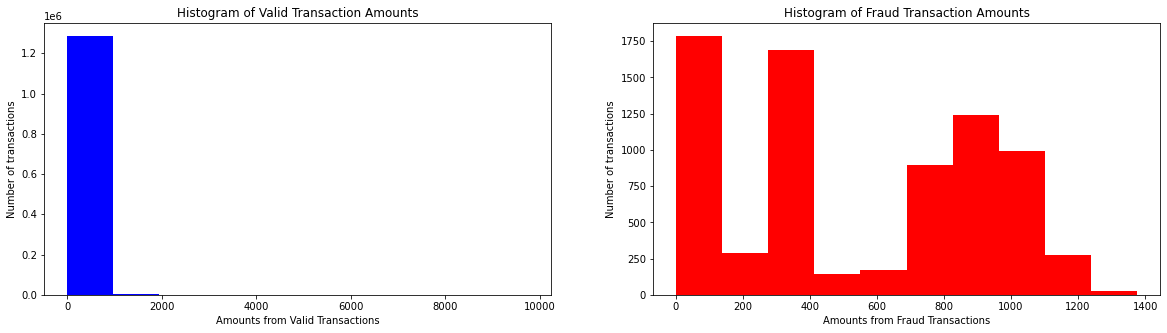

In [12]:
#Histogram of 'amt' column
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].hist(cc_data_valid['amt'], color = 'blue')
ax[1].hist(cc_data_fraud['amt'], color = 'red')

ax[0].set_xlabel('Amounts from Valid Transactions')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Histogram of Valid Transaction Amounts')

ax[1].set_xlabel('Amounts from Fraud Transactions')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Histogram of Fraud Transaction Amounts')

#Are histograms an effective way to visualize this column due to the unbalanced nature of fraud vs valid?

Text(0, 0.5, 'Amount')

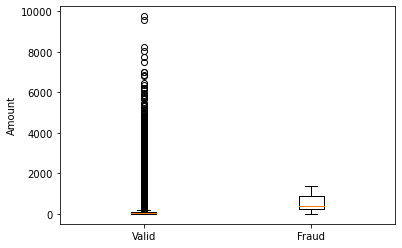

In [13]:
#Boxplots of 'amt' column
plt.boxplot([cc_data_valid['amt'], cc_data_fraud['amt']])
plt.xticks([1, 2], ['Valid', 'Fraud'])
plt.ylabel('Amount')

In [14]:
#Compare means of amounts for valid vs fraud.
valid_amt_mean = np.mean(cc_data_valid['amt'])
fraud_amt_mean = np.mean(cc_data_fraud['amt'])
print("Mean of valid transaction amounts:", valid_amt_mean)
print("Mean of fraud transaction amounts:", fraud_amt_mean)

Mean of valid transaction amounts: 66.88413217972892
Mean of fraud transaction amounts: 531.3200919264573


Even with large number of outliers from valid transactions, the mean of fraud transactions is still SIGNIFICANTLY higher than valid transactions.  The 'amt' column can definitely be a good predictor of fraud.  

Still, we will remove some outliers.

In [15]:
#Remove outliers 
cc_data = cc_data[cc_data['amt']<=1500]

#Reassign valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

Text(0.5, 1.0, 'Histogram of Fraud Transaction Amounts')

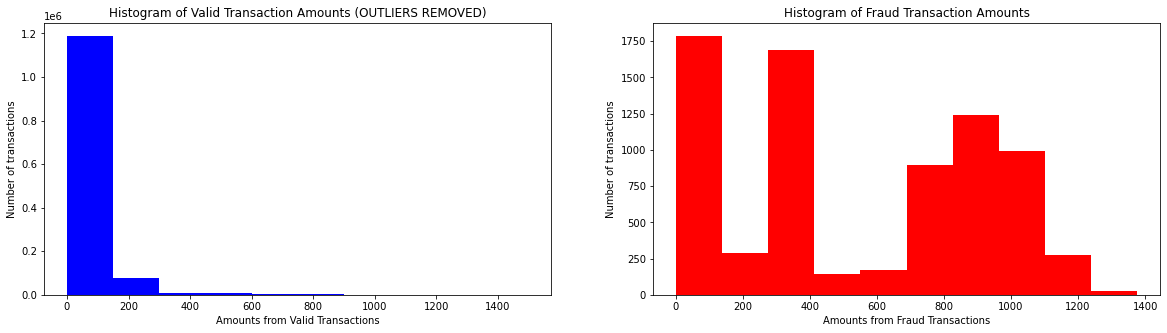

In [16]:
#Check histograms again
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].hist(cc_data_valid['amt'], color = 'blue')
ax[1].hist(cc_data_fraud['amt'], color = 'red')

ax[0].set_xlabel('Amounts from Valid Transactions')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Histogram of Valid Transaction Amounts (OUTLIERS REMOVED)')

ax[1].set_xlabel('Amounts from Fraud Transactions')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Histogram of Fraud Transaction Amounts')

Text(0, 0.5, 'Amount')

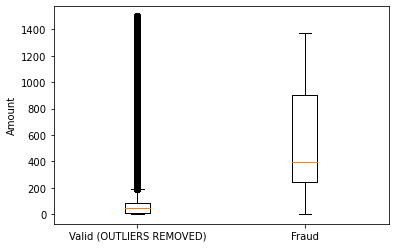

In [17]:
#Check boxplots again
plt.boxplot([cc_data_valid['amt'], cc_data_fraud['amt']])
plt.xticks([1, 2], ['Valid (OUTLIERS REMOVED)', 'Fraud'])
plt.ylabel('Amount')

## Examine 'city_pop' column

(array([6924.,  200.,  145.,   62.,   63.,   54.,    0.,    0.,   19.,
          39.]),
 array([2.3000000e+01, 2.9069070e+05, 5.8135840e+05, 8.7202610e+05,
        1.1626938e+06, 1.4533615e+06, 1.7440292e+06, 2.0346969e+06,
        2.3253646e+06, 2.6160323e+06, 2.9067000e+06]),
 <BarContainer object of 10 artists>)

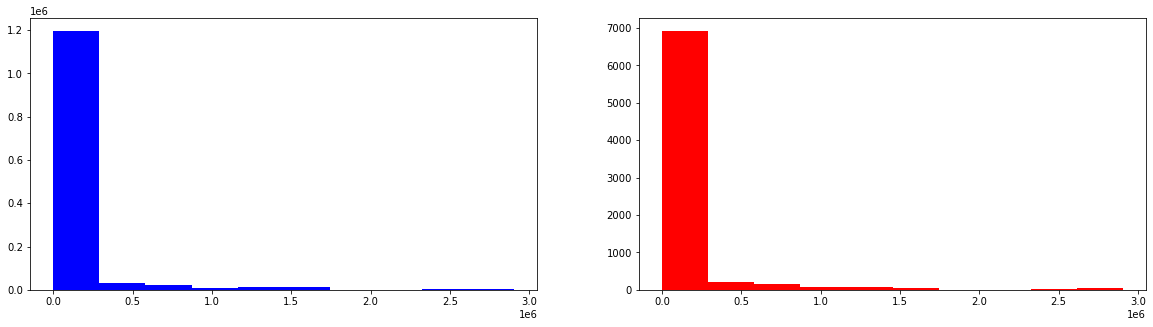

In [18]:
# Histogram of 'city_pop' column
fig, ax = plt.subplots(1,2, figsize = (20, 5))
ax[0].hist(cc_data_valid['city_pop'], color = 'blue')
ax[1].hist(cc_data_fraud['city_pop'], color = 'red')

Text(0, 0.5, 'City Population')

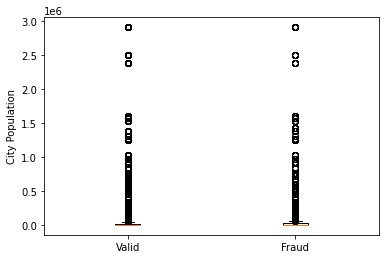

In [19]:
#Boxplot of 'city_pop' column
#Boxplots of 'amt' column
plt.boxplot([cc_data_valid['city_pop'], cc_data_fraud['city_pop']])
plt.xticks([1, 2], ['Valid', 'Fraud'])
plt.ylabel('City Population')

Not sure if we can extract any meaningful information from the 'city_pop' column.  They are too similar between valid and fraud transactions.  <b>Should we remove this column? <b/>

## Examine visualizations of 'category' variable (categorical)

#### Does the transaction category affect our target variable?

In [20]:
valid_cat_count = cc_data_valid['category'].value_counts().sort_index()
fraud_cat_count = cc_data_fraud['category'].value_counts().sort_index()

<ipython-input-21-a98afde5cca9>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(valid_cat_count.index, rotation=90)
<ipython-input-21-a98afde5cca9>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(fraud_cat_count.index, rotation=90)


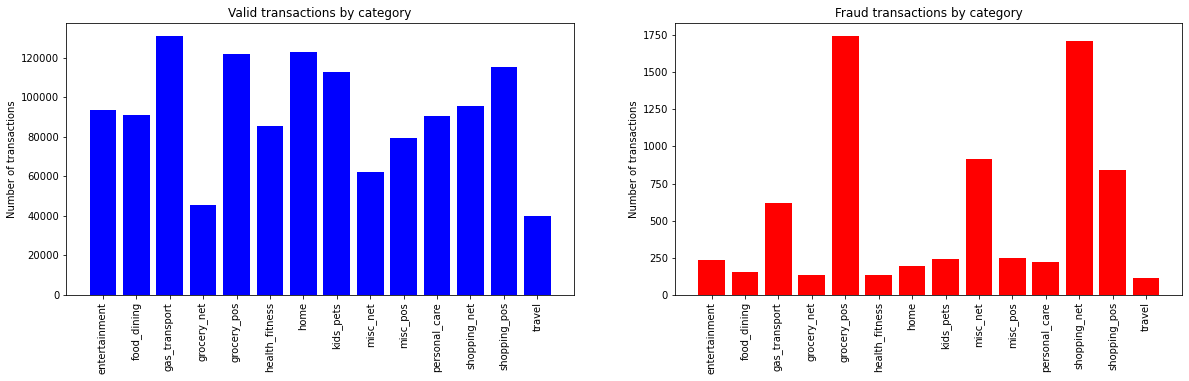

In [21]:
# Category column
fig, ax = plt.subplots(1, 2, figsize=(20,5))

ax[0].bar(valid_cat_count.index, valid_cat_count, color = 'blue')
ax[1].bar(fraud_cat_count.index, fraud_cat_count, color = 'red')

ax[0].set_xticklabels(valid_cat_count.index, rotation=90)
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by category')
ax[1].set_xticklabels(fraud_cat_count.index, rotation=90)
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by category')

plt.show()


Valid transactions are spread out among categories, with a few that have significantly lower transactions (grocery_net, travel).

Fraud transactions are primarily in 'grocery_pos' and 'shopping_net' categories, with 'misc_net', 'shopping_pos', and 'gas_transport' as the next tier of transaction categories.  

'category' can be a decent predictor of fraud.

## One-hot encoding for 'category' variable

In [22]:
cat_dummies = pd.get_dummies(cc_data['category'],prefix='category')

In [23]:
# Concatenate one-hot encoded dataframes to main dataframe.
cc_data = pd.concat([cc_data, cat_dummies], axis=1)

In [24]:
# Check dataframe
cc_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,state,city_pop,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,NC,3495,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,WA,149,...,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,ID,4154,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,MT,1939,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,VA,99,...,0,0,0,0,0,1,0,0,0,0


In [25]:
#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

## Examine 'gender' column

Text(0.5, 1.0, 'Fraud transactions by gender')

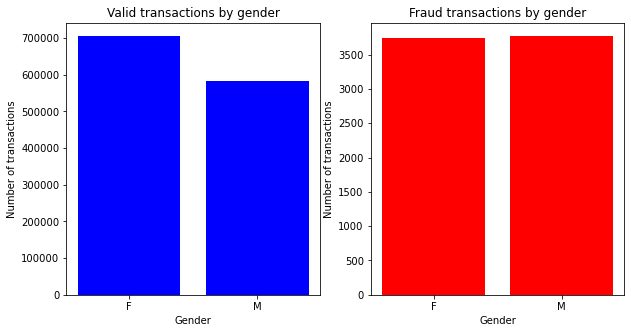

In [26]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].bar(cc_data_valid['gender'].value_counts().sort_index().index, cc_data_valid['gender'].value_counts().sort_index(), color = 'blue')
ax[1].bar(cc_data_fraud['gender'].value_counts().sort_index().index, cc_data_fraud['gender'].value_counts().sort_index(), color = 'red')

ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by gender')

ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by gender')

Does not seem like gender is a strong predictor of fraud.  We can remove this column.

In [27]:
# Filter out 'gender' column
cc_data.drop('gender', axis=1, inplace=True)

In [28]:
#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

## Examine 'state' column

In [29]:
#Check number of unique states from valid transactions
valid_state_count = cc_data_valid['state'].value_counts().sort_index()

In [30]:
# Check number of unique states from fraud transactions
fraud_state_count = cc_data_fraud['state'].value_counts().sort_index()

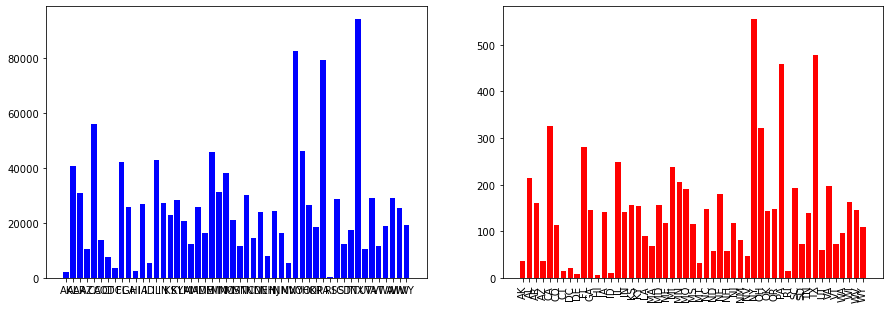

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define bar width.
bar_width = 0.8

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax[0].bar(valid_state_count.index, valid_state_count, width = bar_width, color = 'blue')
b2 = ax[1].bar(fraud_state_count.index, fraud_state_count, width = bar_width, color = 'red')

plt.xticks(rotation=90)
plt.show()

In [32]:
#Group states by region
new_england = ['ME', 'VT', 'NH', 'MA', 'CT', 'RI']
mid_atlantic =['NY', 'PA', 'NJ']
east_north_central = ['WI', 'MI', 'IL', 'IN', 'OH']
west_north_central = ['ND', 'MN', 'SD', 'NE', 'IA', 'KS', 'MO']
south_atlantic = ['WV', 'MD', 'DC', 'DE', 'VA', 'NC', 'SC', 'GA', 'FL']
east_south_central = ['KY', 'TN', 'MS', 'AL']
west_south_central = ['TX', 'OK', 'AR', 'LA']
mountain = ['MT','ID', 'WY', 'NV', 'UT', 'CO', 'AZ', 'NM']
pacific = ['AK', 'WA', 'OR', 'CA', 'HI']

#check length
len(new_england) + len(mid_atlantic) + len(east_north_central) + len(west_north_central) + len(south_atlantic) + len(east_south_central) + len(west_south_central) + len(mountain) + len(pacific)

51

In [33]:
# making a new column in cc_data for region
# create a list of conditions
conditions = [
    cc_data['state'].isin(new_england),
    cc_data['state'].isin(mid_atlantic),
    cc_data['state'].isin(east_north_central),
    cc_data['state'].isin(west_north_central),
    cc_data['state'].isin(south_atlantic),
    cc_data['state'].isin(east_south_central),
    cc_data['state'].isin(west_south_central),
    cc_data['state'].isin(mountain),
    cc_data['state'].isin(pacific)
        ]


# create a list of the values we want to assign for each condition
values = [
    'new_england', 
    'mid_atlantic', 
    'east_north_central', 
    'west_north_central', 
    'south_atlantic', 
    'east_south_central',
    'west_south_central',
    'mountain',
    'pacific'
]

# create a new column and use np.select to assign values to it using our lists as arguments
cc_data['region'] = np.select(conditions, values)

# display updated DataFrame
cc_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,state,city_pop,job,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,region
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,NC,3495,"Psychologist, counselling",...,0,0,0,1,0,0,0,0,0,south_atlantic
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,WA,149,Special educational needs teacher,...,0,0,0,0,0,0,0,0,0,pacific
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,ID,4154,Nature conservation officer,...,0,0,0,0,0,0,0,0,0,mountain
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,MT,1939,Patent attorney,...,0,0,0,0,0,0,0,0,0,mountain
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,VA,99,Dance movement psychotherapist,...,0,0,0,0,1,0,0,0,0,south_atlantic


In [34]:
#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

<ipython-input-35-29b3d6538c45>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
<ipython-input-35-29b3d6538c45>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')


[Text(0, 0, 'east_north_central'),
 Text(1, 0, 'east_south_central'),
 Text(2, 0, 'mid_atlantic'),
 Text(3, 0, 'mountain'),
 Text(4, 0, 'new_england'),
 Text(5, 0, 'pacific'),
 Text(6, 0, 'south_atlantic'),
 Text(7, 0, 'west_north_central'),
 Text(8, 0, 'west_south_central')]

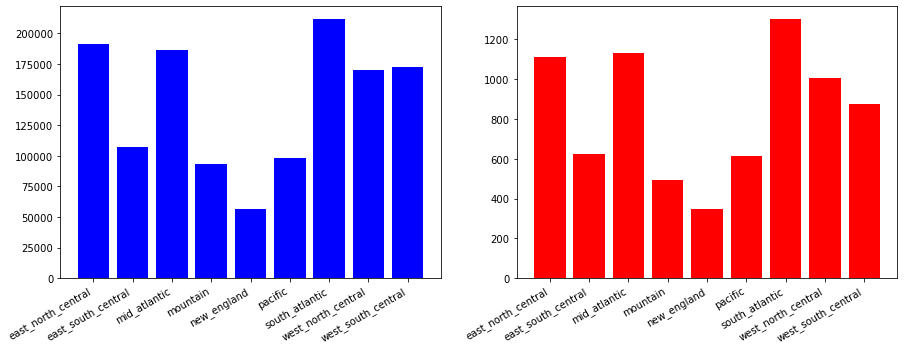

In [35]:
#Plot bar graph of transactions by region
valid_region_count = cc_data_valid['region'].value_counts().sort_index()
fraud_region_count = cc_data_fraud['region'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Define bar width.
bar_width = 0.8

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax1.bar(valid_region_count.index, valid_region_count, width = bar_width, color = 'blue')
#plt.xticks(rotation=90)

b2 = ax2.bar(fraud_region_count.index, fraud_region_count, width = bar_width, color = 'red')
#plt.xticks(rotation=90)

plt.draw()

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')


No discernable information from newly created 'region' column.

In [36]:
#See if there are certain states that have significantly higher fraud transactions or valid transactions:
# get percentages
valid_state_pct = cc_data_valid['state'].value_counts(normalize=True).sort_values(ascending=False)
fraud_state_pct = cc_data_fraud['state'].value_counts(normalize=True).sort_values(ascending=False)

In [37]:
valid_state_pct

TX    0.073225
NY    0.064335
PA    0.061595
CA    0.043457
OH    0.035809
MI    0.035616
IL    0.033357
FL    0.032879
AL    0.031616
MO    0.029633
MN    0.024445
AR    0.024028
NC    0.023364
WI    0.022661
VA    0.022533
SC    0.022494
KY    0.021974
IN    0.021292
IA    0.020825
OK    0.020570
MD    0.020179
GA    0.020107
WV    0.019817
NJ    0.018988
NE    0.018604
KS    0.017718
MS    0.016343
LA    0.016196
WY    0.014897
WA    0.014607
OR    0.014313
TN    0.013507
ME    0.012712
NM    0.012656
ND    0.011428
CO    0.010683
MA    0.009548
SD    0.009504
MT    0.009093
VT    0.009072
AZ    0.008328
UT    0.008252
NH    0.006376
CT    0.005961
NV    0.004312
ID    0.004296
DC    0.002786
HI    0.001981
AK    0.001615
RI    0.000415
Name: state, dtype: float64

In [38]:
fraud_state_pct

NY    0.073941
TX    0.063816
PA    0.061018
CA    0.043432
OH    0.042766
FL    0.037437
IL    0.033040
MI    0.031708
AL    0.028644
MN    0.027578
VA    0.026379
SC    0.025713
MO    0.025446
NE    0.023981
WI    0.021716
AR    0.021450
MD    0.020917
KS    0.020783
KY    0.020650
NC    0.019851
OR    0.019851
GA    0.019451
WV    0.019451
OK    0.019051
IN    0.018918
IA    0.018918
TN    0.018652
ME    0.015854
NJ    0.015721
MS    0.015321
CO    0.015055
WY    0.014655
WA    0.012790
LA    0.012124
NM    0.010925
SD    0.009859
VT    0.009592
MA    0.009193
UT    0.008127
NH    0.007860
ND    0.007594
NV    0.006262
AZ    0.004929
AK    0.004796
MT    0.004263
DC    0.002798
CT    0.002132
RI    0.001998
ID    0.001465
DE    0.001199
HI    0.000933
Name: state, dtype: float64

Both valid and fraud datasets have NY, TX, PA, CA, and OH as the top five states for number of transactions. 'state' column may not produce any helpful information in predicting the target variable, but we will hold onto it for now.

### Feature hashing the state column

In [39]:
from sklearn.feature_extraction import FeatureHasher

h = FeatureHasher(n_features = 10, input_type = 'string')

valid_hash = h.transform(cc_data['state']).toarray()
cc_data = pd.concat([cc_data, pd.DataFrame(valid_hash)], axis = 1)

In [40]:
#Check dataframe
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 37 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   trans_date_trans_time    1295379 non-null  object 
 1   cc_num                   1295379 non-null  object 
 2   merchant                 1295379 non-null  object 
 3   category                 1295379 non-null  object 
 4   amt                      1295379 non-null  float64
 5   first                    1295379 non-null  object 
 6   last                     1295379 non-null  object 
 7   state                    1295379 non-null  object 
 8   city_pop                 1295379 non-null  float64
 9   job                      1295379 non-null  object 
 10  dob                      1295379 non-null  object 
 11  is_fraud                 1295379 non-null  float64
 12  category_entertainment   1295379 non-null  float64
 13  category_food_dining     1295379 non-null 

In [41]:
#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

<b> Question: </b>Instead of feature hashing the state column, can we do one hot encoding, and then use PCA to reduce the dimensions?

## Examining 'trans_date_trans_time' column

- convert trans_date_trans_time into datetime object
- separate transaction date and transaction time into separate columns (is this necessary?)
- make new column, extracting day of week from transaction date
- make new column, grouping transaction times into categories (morning, afternoon, evening)
- examine day of week
- examine transaction times

In [42]:
# Convert to datetime object
cc_data['trans_date_trans_time']=pd.to_datetime(cc_data['trans_date_trans_time'])

#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

In [43]:
#Check datatypes
cc_data_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287873 entries, 0 to 1296674
Data columns (total 37 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   trans_date_trans_time    1287873 non-null  datetime64[ns]
 1   cc_num                   1287873 non-null  object        
 2   merchant                 1287873 non-null  object        
 3   category                 1287873 non-null  object        
 4   amt                      1287873 non-null  float64       
 5   first                    1287873 non-null  object        
 6   last                     1287873 non-null  object        
 7   state                    1287873 non-null  object        
 8   city_pop                 1287873 non-null  float64       
 9   job                      1287873 non-null  object        
 10  dob                      1287873 non-null  object        
 11  is_fraud                 1287873 non-null  float64       
 12  

In [44]:
cc_data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506 entries, 2449 to 1295733
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trans_date_trans_time    7506 non-null   datetime64[ns]
 1   cc_num                   7506 non-null   object        
 2   merchant                 7506 non-null   object        
 3   category                 7506 non-null   object        
 4   amt                      7506 non-null   float64       
 5   first                    7506 non-null   object        
 6   last                     7506 non-null   object        
 7   state                    7506 non-null   object        
 8   city_pop                 7506 non-null   float64       
 9   job                      7506 non-null   object        
 10  dob                      7506 non-null   object        
 11  is_fraud                 7506 non-null   float64       
 12  category_entertainment   750

In [45]:
#Get day of week, create new columns
cc_data['day_of_week'] = cc_data['trans_date_trans_time'].dt.dayofweek

#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

In [46]:
valid_dayofweek_count = cc_data_valid.groupby('day_of_week').count()
fraud_dayofweek_count = cc_data_fraud.groupby('day_of_week').count()

Text(0.5, 1.0, 'Fraud transactions by day of week')

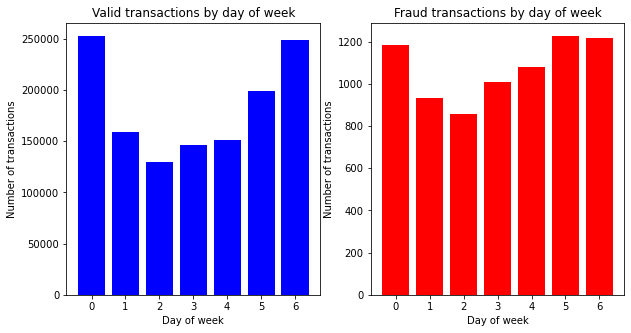

In [47]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].bar(valid_dayofweek_count.index, valid_dayofweek_count['trans_date_trans_time'], color = 'blue')
ax[1].bar(fraud_dayofweek_count.index, fraud_dayofweek_count['trans_date_trans_time'], color = 'red')

ax[0].set_xlabel('Day of week')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by day of week')

ax[1].set_xlabel('Day of week')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by day of week')

Most valid transactions happen on days 0, 5, and 6 (Monday, Saturday, and Sunday).

Similar pattern for fraud transactions, but not as much of a stark contrast between days.

Not sure if we can get much out of day of week.  Just in case, let's examine transaction day of week for each transaction category.

In [48]:
# create a function that will graph bar subplots 

def dayofweek_subplots_cat(category):
    """Creates subplots for valid transactions and fraud transactions with transaction category as input"""
    valid_dayofweek_count = cc_data_valid[cc_data_valid['category']==category].groupby('day_of_week').count()
    fraud_dayofweek_count = cc_data_fraud[cc_data_fraud['category']==category].groupby('day_of_week').count()
    
    fig, ax = plt.subplots(1, 2, figsize = (14, 3))

    ax[0].bar(valid_dayofweek_count.index, valid_dayofweek_count['trans_date_trans_time'], color = 'blue')
    ax[1].bar(fraud_dayofweek_count.index, fraud_dayofweek_count['trans_date_trans_time'], color = 'red')

    ax[0].set_xlabel('Day of week')
    ax[0].set_ylabel('Number of transactions')
    ax[0].set_title('Valid transactions by day of week, category: {}'.format(category))

    ax[1].set_xlabel('Day of week')
    ax[1].set_ylabel('Number of transactions')
    ax[1].set_title('Fraud transactions by day of week, category: {}'.format(category))
    
    plt.show()

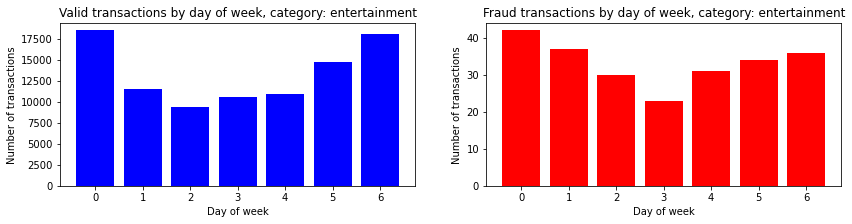

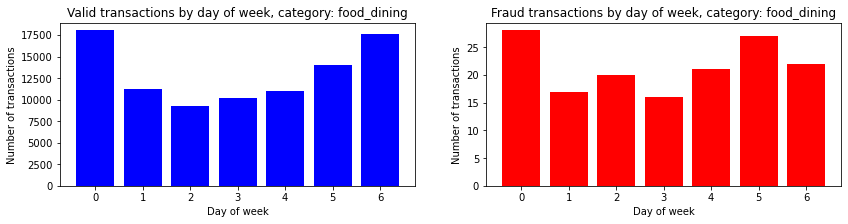

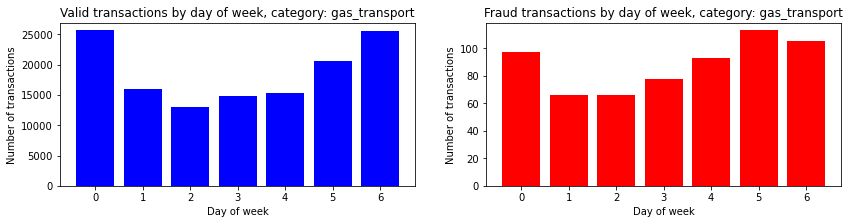

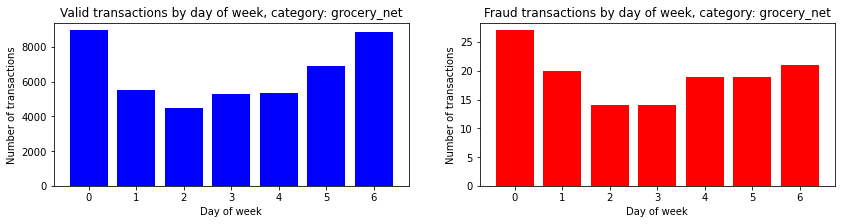

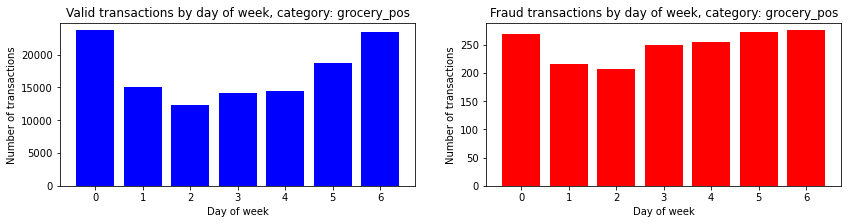

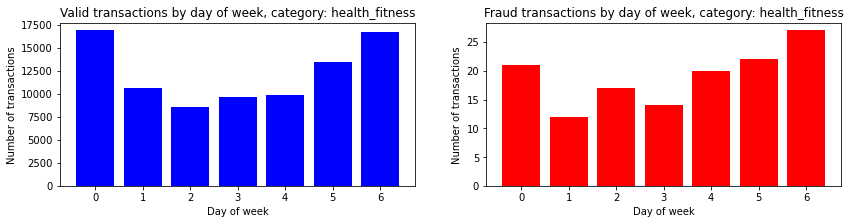

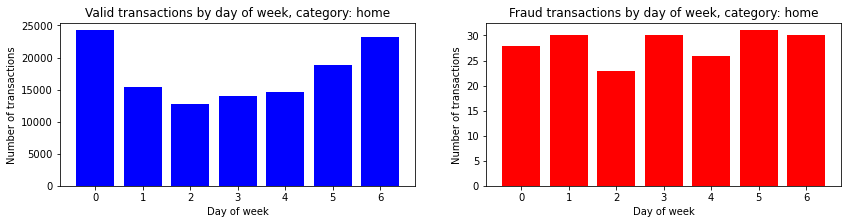

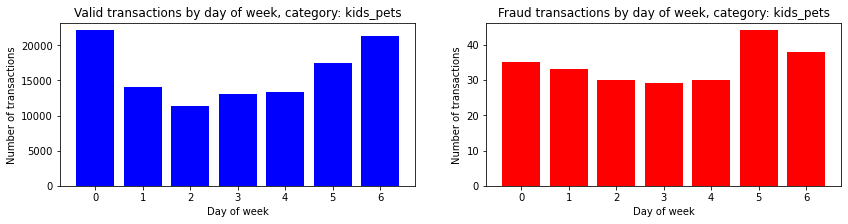

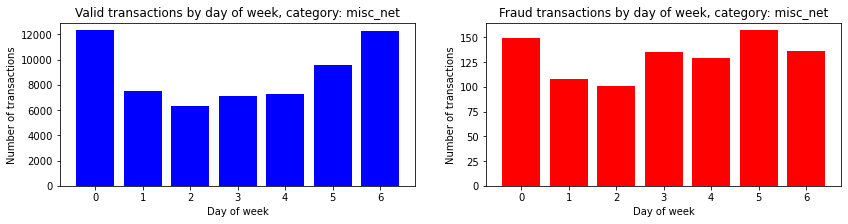

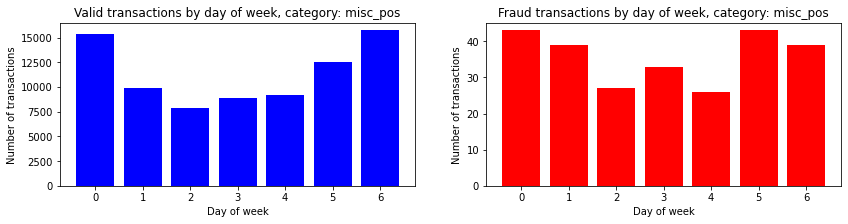

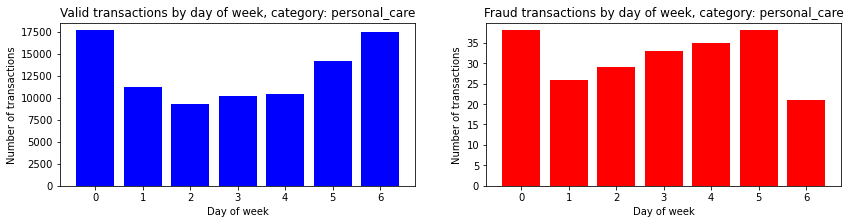

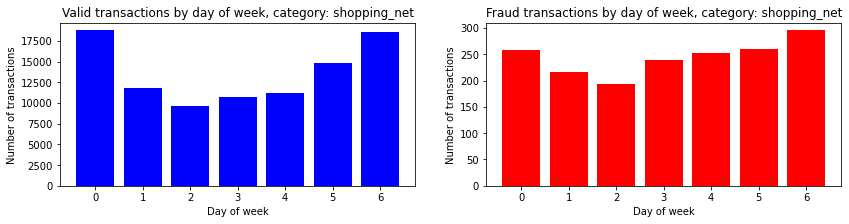

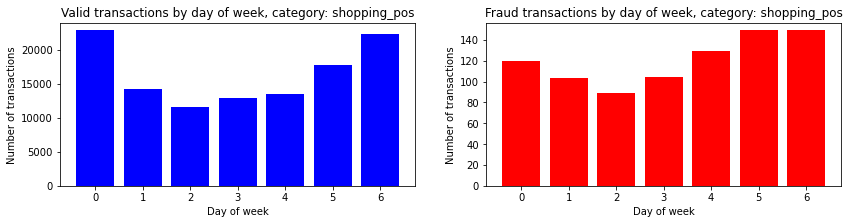

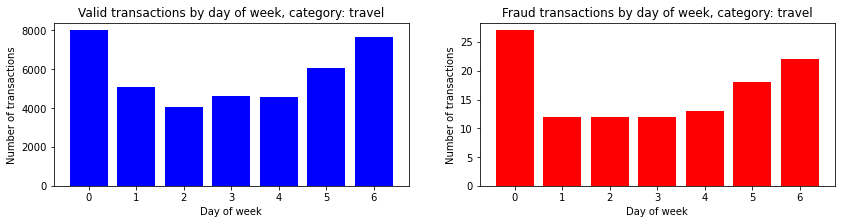

In [49]:
dayofweek_subplots_cat('entertainment')
dayofweek_subplots_cat('food_dining')
dayofweek_subplots_cat('gas_transport')
dayofweek_subplots_cat('grocery_net')
dayofweek_subplots_cat('grocery_pos')
dayofweek_subplots_cat('health_fitness')
dayofweek_subplots_cat('home')
dayofweek_subplots_cat('kids_pets')
dayofweek_subplots_cat('misc_net')
dayofweek_subplots_cat('misc_pos')
dayofweek_subplots_cat('personal_care')
dayofweek_subplots_cat('shopping_net')
dayofweek_subplots_cat('shopping_pos')
dayofweek_subplots_cat('travel')

Let's inspect the number of transactions for each month for valid vs fraud.

In [50]:
#Get month, create new column
cc_data['month'] = cc_data['trans_date_trans_time'].dt.month

#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

Text(0.5, 1.0, 'Fraud transactions by month')

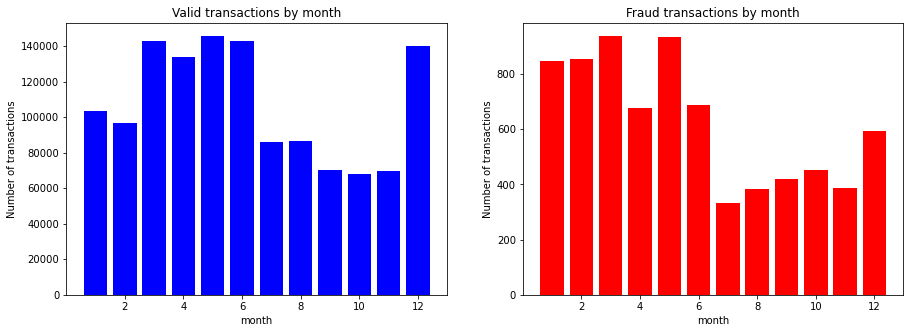

In [51]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].bar(cc_data_valid['month'].value_counts().sort_index().index, cc_data_valid['month'].value_counts().sort_index(), color = 'blue')
ax[1].bar(cc_data_fraud['month'].value_counts().sort_index().index, cc_data_fraud['month'].value_counts().sort_index(), color = 'red')

ax[0].set_xlabel('month')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by month')

ax[1].set_xlabel('month')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by month')

Most valid transactions happen during:
- March
- April
- May
- June
- December

Most fraud transactions happen during
- January
- February
- March
- April
- May
- June
- December

Month could be a possible predictor of fraud transactions. Let's inspect transactions by month for each category.

In [52]:
# create a function that will graph bar subplots 

def month_subplots_cat(category):
    """Creates subplots for valid transactions and fraud transactions with transaction category as input"""
    valid_month_count = cc_data_valid[cc_data_valid['category']==category].groupby('month').count()
    fraud_month_count = cc_data_fraud[cc_data_fraud['category']==category].groupby('month').count()
    
    fig, ax = plt.subplots(1, 2, figsize = (14, 3))

    ax[0].bar(valid_month_count.index, valid_month_count['trans_date_trans_time'], color = 'blue')
    ax[1].bar(fraud_month_count.index, fraud_month_count['trans_date_trans_time'], color = 'red')

    ax[0].set_xlabel('Month')
    ax[0].set_ylabel('Number of transactions')
    ax[0].set_title('Valid transactions by month, category: {}'.format(category))

    ax[1].set_xlabel('Month')
    ax[1].set_ylabel('Number of transactions')
    ax[1].set_title('Fraud transactions by month, category: {}'.format(category))
    
    plt.show()

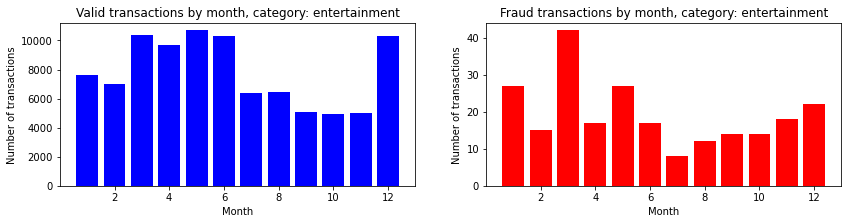

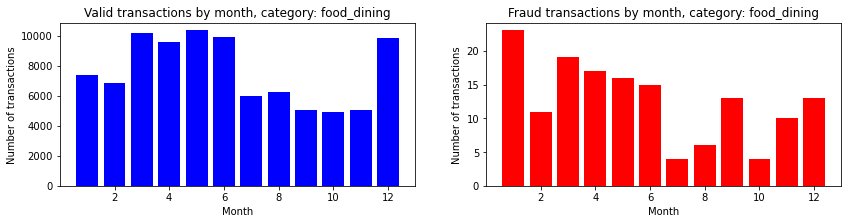

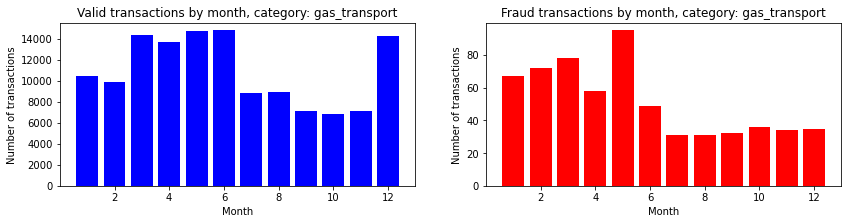

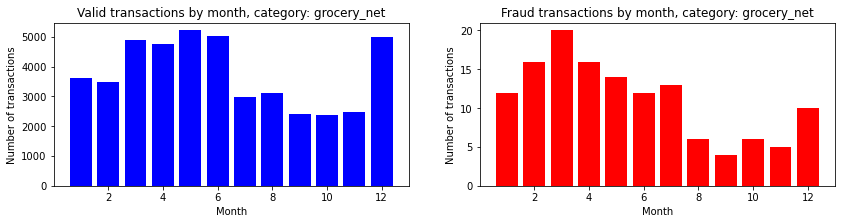

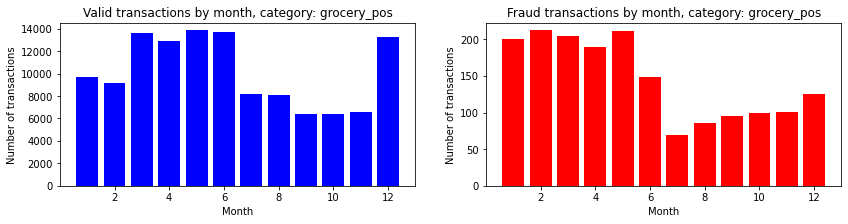

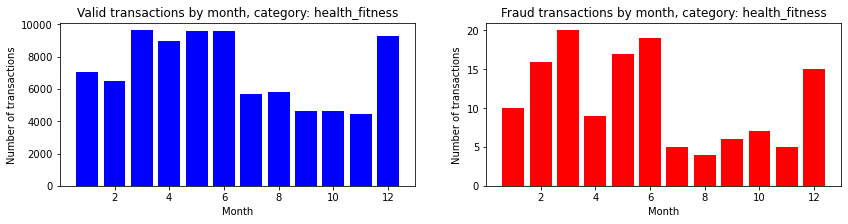

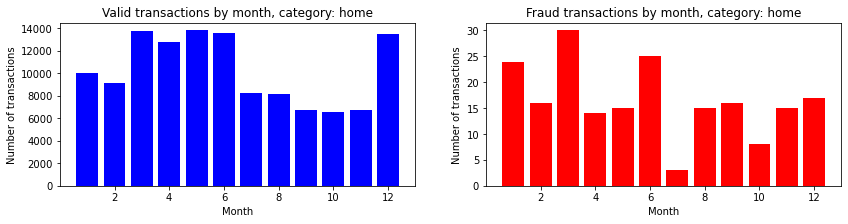

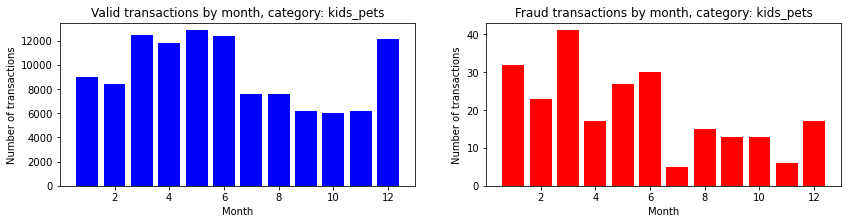

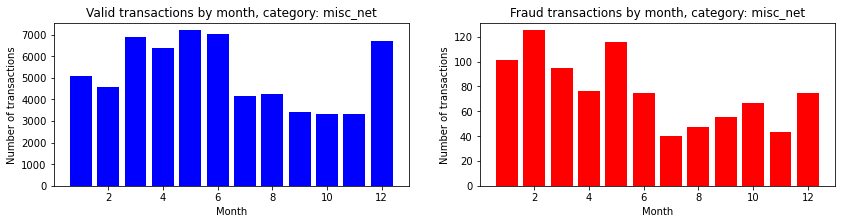

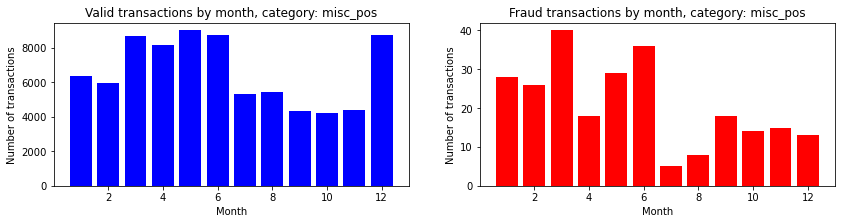

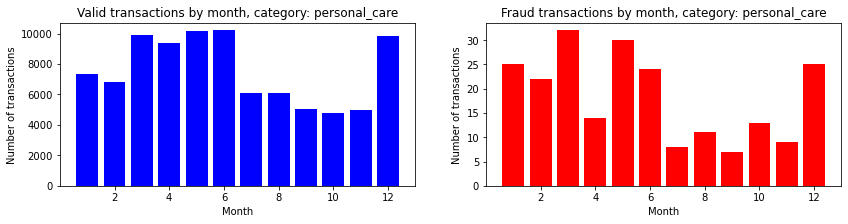

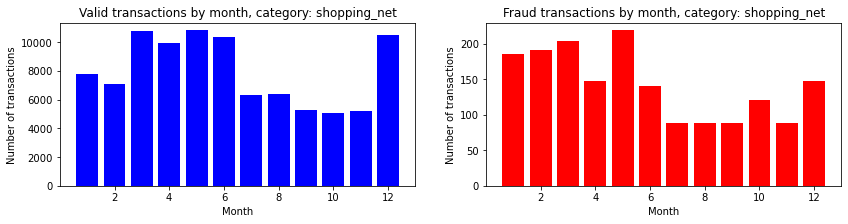

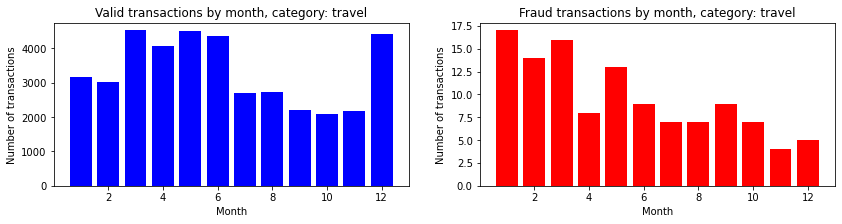

In [53]:
month_subplots_cat('entertainment')
month_subplots_cat('food_dining')
month_subplots_cat('gas_transport')
month_subplots_cat('grocery_net')
month_subplots_cat('grocery_pos')
month_subplots_cat('health_fitness')
month_subplots_cat('home')
month_subplots_cat('kids_pets')
month_subplots_cat('misc_net')
month_subplots_cat('misc_pos')
month_subplots_cat('personal_care')
month_subplots_cat('shopping_net')
month_subplots_cat('travel')

There seems to be enough differences in behavior by category for transactions in each month.

In [54]:
# Checking time of day (hour) of transactions
cc_data['hour'] = cc_data['trans_date_trans_time'].dt.hour

#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

Text(0.5, 1.0, 'Fraud transactions by hour of day')

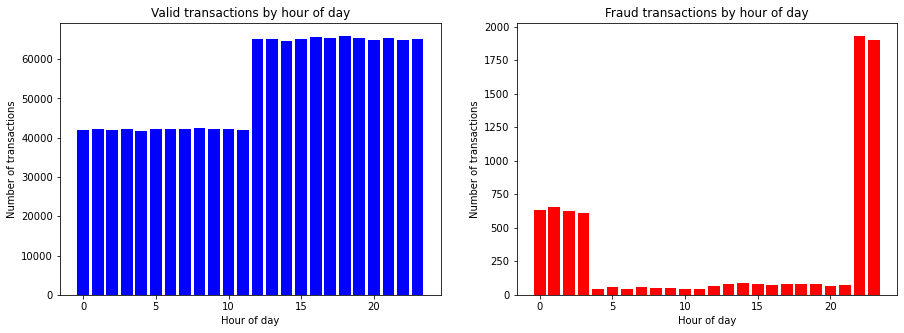

In [55]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].bar(cc_data_valid['hour'].value_counts().sort_index().index, cc_data_valid['hour'].value_counts().sort_index(), color = 'blue')
ax[1].bar(cc_data_fraud['hour'].value_counts().sort_index().index, cc_data_fraud['hour'].value_counts().sort_index(), color = 'red')

ax[0].set_xlabel('Hour of day')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by hour of day')

ax[1].set_xlabel('Hour of day')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by hour of day')

Time of day is DEFINITELY a predictor of fraud transactions.  Most fraud transactions take place in the 22nd and 23 hour of the day (10 PM - 12 AM), then there's another group of fraud transactions taking place from the 0th hour to the 3rd hour of the day (12 AM - 4 AM).

<b>Question: </b> Should we one hot encode this variable, or create groups such as is_22_23 and is_0_to_3?

## Examine 'dob' column

In [56]:
# Convert to datetime object
cc_data['dob']=pd.to_datetime(cc_data['dob'])

In [57]:
#create age column
cc_data['age'] = cc_data['trans_date_trans_time'].dt.year - cc_data['dob'].dt.year

In [58]:
#Redefine valid and fraud dataframes
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

Text(0.5, 1.0, 'Fraud transactions by age')

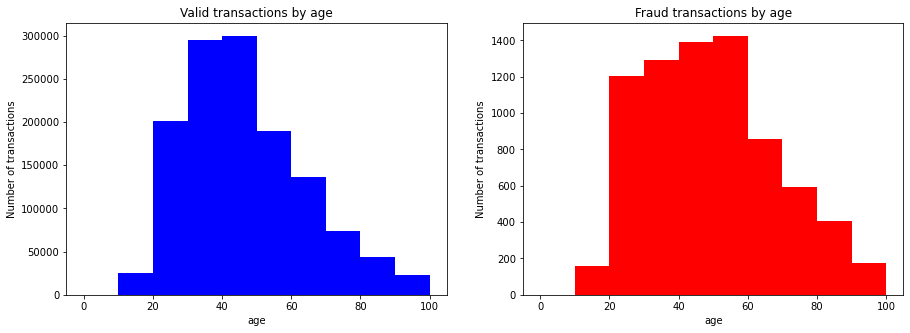

In [59]:
#check histograms
fig, ax = plt.subplots(1, 2, figsize=(15,5))

bins =[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

ax[0].hist(cc_data_valid['age'], color = 'blue', bins = bins)
ax[1].hist(cc_data_fraud['age'], color = 'red', bins = bins)

ax[0].set_xlabel('age')
ax[0].set_ylabel('Number of transactions')
ax[0].set_title('Valid transactions by age')

ax[1].set_xlabel('age')
ax[1].set_ylabel('Number of transactions')
ax[1].set_title('Fraud transactions by age')

Most fraud transactions are coming from customers whose age is from 20-60. Most valid transactions are from customers whose age is from 30-50. 

#### Good predictors of fraud
- 'amt'
- 'category'
- 'state'
- 'month'
- 'hour'
- 'age'

In [60]:
#save the data to a new csv file
cc_data.to_csv('../raw_data/fraudTrain_cleaned2.csv')